In [30]:
# Import necessary libraries for data handling, visualization, and scaling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Load the original dataset
df = pd.read_csv("Results_21Mar2022.csv")
# STEP 1: Min-Max Scaling on key environmental variables
# Min-Max Scaling 
scaler = MinMaxScaler()
# Create a copy of the dataset to apply scaling
df_scaled = df.copy()
# Apply Min-Max Scaling to normalize selected environmental variables to [0, 1] range
df_scaled[["mean_ghgs", "mean_land", "mean_watscar", "mean_eut"]] = scaler.fit_transform(
    df[["mean_ghgs", "mean_land", "mean_watscar", "mean_eut"]])

In [32]:
print(df[df['diet_group'] == 'meat100']['mean_watuse'].describe())

count    12000.000000
mean       974.222937
std        324.919529
min        537.591798
25%        786.104179
50%        895.292420
75%       1047.905579
max       3325.114571
Name: mean_watuse, dtype: float64


In [33]:
# STEP 2: Re-import and clean data
# Read data
df = pd.read_csv("Results_21Mar2022.csv")

In [34]:
# Filter the columns needed for analysis
cols_to_scale = ["mean_ghgs", "mean_land", "mean_watscar", "mean_eut"]
other_cols = ["diet_group", "sex"]
df_filtered = df[other_cols + cols_to_scale].dropna()
# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
df_scaled = df_filtered.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_filtered[cols_to_scale])

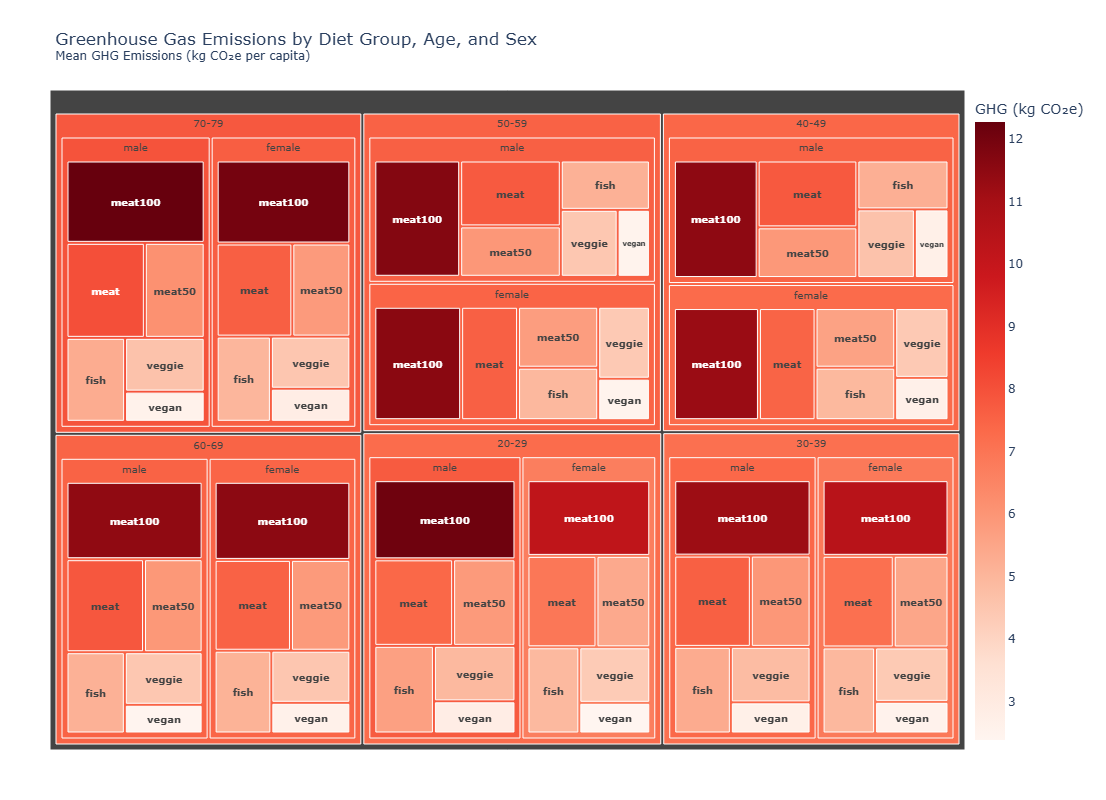

In [35]:
# STEP 3: Create a Treemap Visualisation
import plotly.express as px

def plot_treemap_improved(df):
    # Data preparation
    df_tree = df.groupby(['age_group', 'sex', 'diet_group'])['mean_ghgs'].mean().reset_index()
    df_tree['display_text'] = df_tree['diet_group']  # Display only the diet group name

    # Create the treemap
    fig = px.treemap(
        df_tree,
        path=['age_group', 'sex', 'display_text'],
        values='mean_ghgs',
        color='mean_ghgs',
        color_continuous_scale='Reds',  # Single color gradient
        hover_data={'mean_ghgs': ':.2f'},
        title='Greenhouse Gas Emissions by Diet Group, Age, and Sex<br><sup>Mean GHG Emissions (kg CO₂e per capita)</sup>'
    )

    # Adjust labels and layout
    fig.update_traces(
        texttemplate='<b>%{label}</b>',
        textposition='middle center',
        insidetextfont=dict(size=10),
        hovertemplate=(
            '<b>%{parent}</b><br>'
            'Diet Group: %{label}<br>'
            'GHG Emissions: <b>%{color:.2f} kg CO₂e</b>'
        )
    )
    
    fig.update_layout(
        margin=dict(t=90, l=50, r=120, b=50),
        coloraxis_colorbar=dict(title="GHG (kg CO₂e)", x=1.0, y=0.5),
        height=800,
        width=1100
    )
    
    fig.show()

# Call the function
plot_treemap_improved(df)
